### 1. Considere os dados_ex1.csv em anexo que correspondem a 3 subespécies da mesma espécie de flores. As quatro colunas correspondem respetivamente ao comprimento e largura das sépalas e comprimento e largura das pétalas, tudo em centímetros. A última coluna contém a classificação de cada amostra.

a. Efetue uma breve exploração dos dados. (P.ex, crie um histograma para cada uma das características, determine as médias e desvio padrão, …)

b. Crie um diagrama de dispersão para as sépalas e outro para as pétalas (comprimento vs largura das sépalas e comprimento vs largura das pétalas). Os pontos devem ser identificados de acordo com a sua classificação.

c. Demonstre como treinaria um modelo para classificar novos dados.

d. O ficheiro teste.csv contém um conjunto de dados que é necessário classificar. Classifique os dados no ficheiro teste.csv. Utilize dois métodos diferentes e indique como procedeu à escolha dos parâmetros de cada método. Garanta que os seus resultados podem ser reproduzidos.

e. Utilize a informação em resultados.csv para avaliar os seus métodos.

f. Descreva em menos de 5 linhas as suas conclusões.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
df1 = pd.read_csv('dados_ex1.csv')
df1

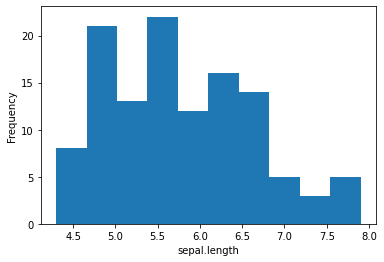

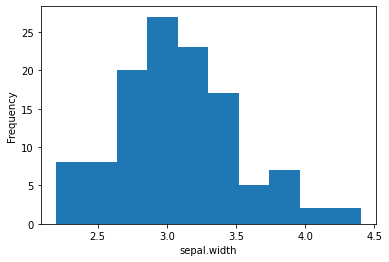

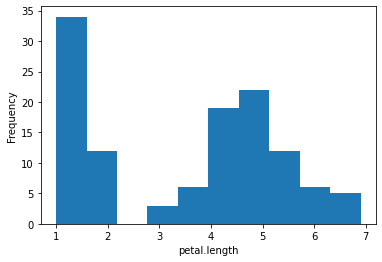

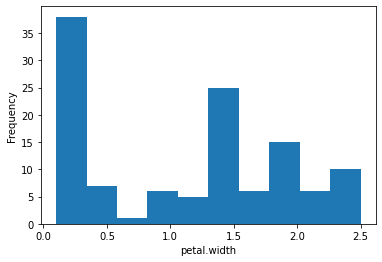

<Figure size 432x288 with 0 Axes>

In [121]:
# Efetue uma breve exploração dos dados, 
# histograma para cada uma das características
for i in range(df1.shape[1]-1):
    plt.hist(df1.iloc[:,i], bins=10)
    plt.xlabel(df1.columns[i])
    plt.ylabel("Frequency")
    plt.show()

plt.savefig('histograma.png')

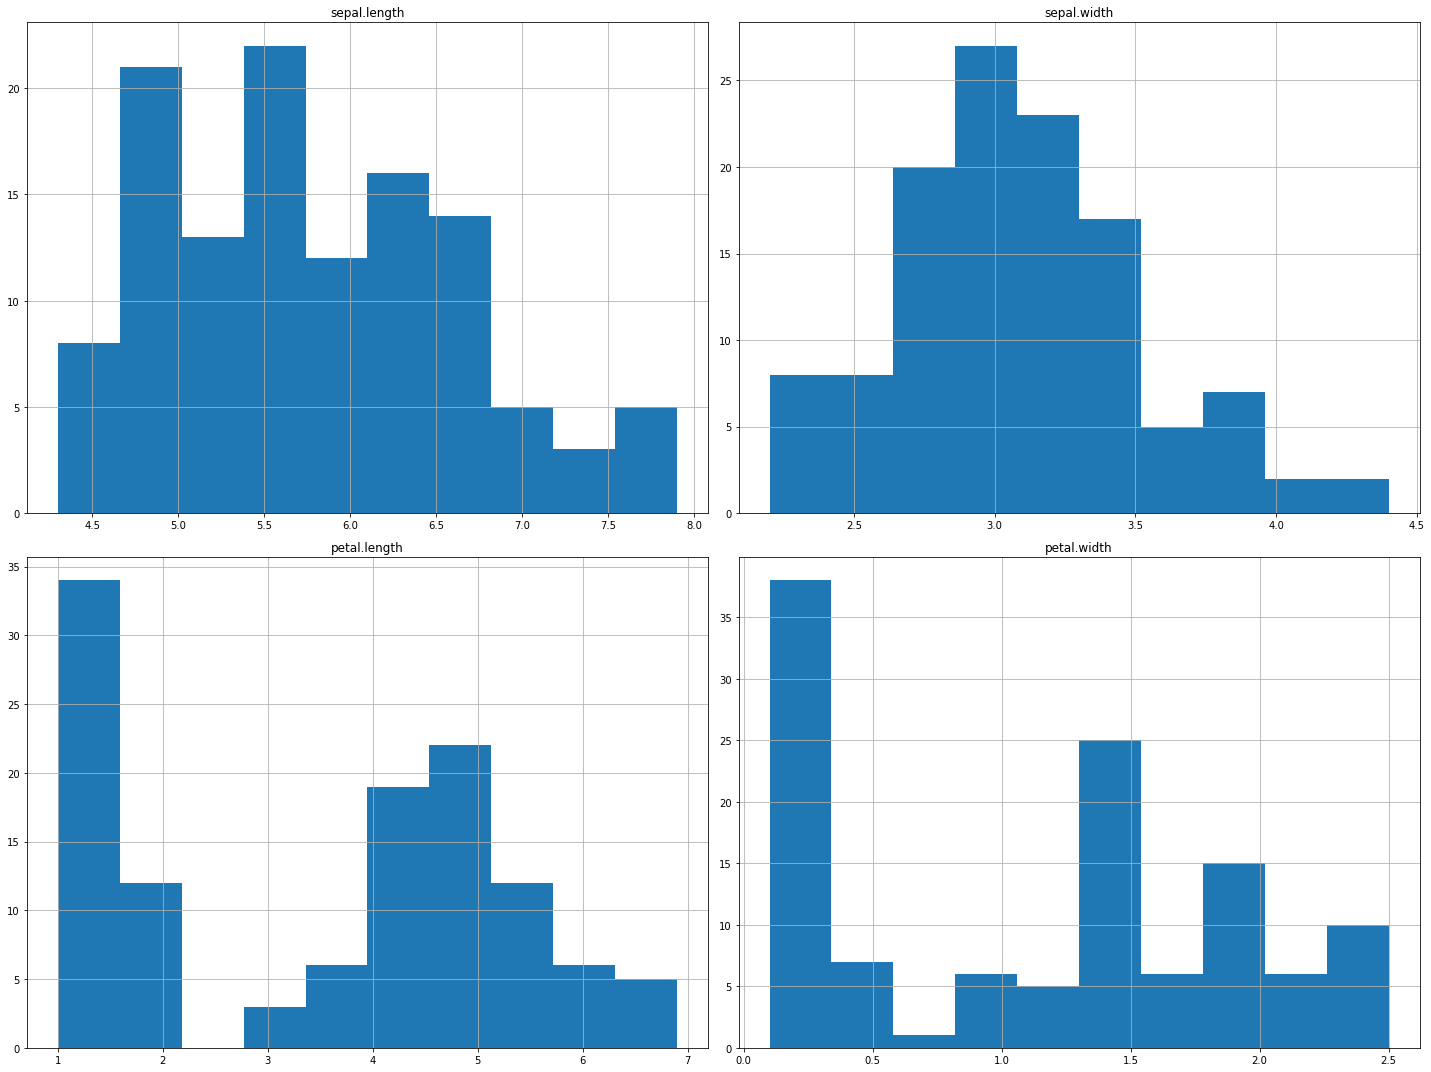

In [122]:
df1.iloc[:,:4].hist(bins=10, figsize=(20,15))
plt.tight_layout()
#plt.show()
plt.savefig('histograma.png')

In [123]:
# Efetue uma breve exploração dos dados, 
	# determine as médias e desvio padrão, ...

df1.iloc[:,:4].describe()
# Q2 (50%) também representa a mediana


,sepal.length,sepal.width,petal.length,petal.width
count,119.000000,119.000000,119.000000,119.000000
mean,5.773950,3.086555,3.547899,1.107563
std,0.845172,0.437428,1.799334,0.767912
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.200000
50%,5.700000,3.000000,4.100000,1.300000
75%,6.400000,3.400000,5.000000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [130]:
#salvar em um arquivo excel a tabela 
df1.iloc[:,:4].describe().to_excel('describe1.xlsx', index=False)

In [ ]:
#diagrama de dispersão para as sépalas
sns.scatterplot(x="sepal.length", y="sepal.width", hue="variety", data=df1)
plt.savefig('sepalas.png')
plt.show()
# diagrama de dispersão para as pétalas
sns.scatterplot(x="petal.length", y="petal.width", hue="variety", data=df1)
plt.savefig('petalas.png')
plt.show()


In [ ]:
# Demonstre como treinaria um modelo para classificar novos dados

# 1. Separar os dados em treinamento e validação
train_data, test_data, train_labels, test_labels = train_test_split(df1.iloc[:, :-1], df1.iloc[:, -1], test_size=0.2)

# 2. Treinar o modelo de árvore de decisão
model_DT = DecisionTreeClassifier()
model_DT.fit(train_data, train_labels)

# 3. Treinar o modelo de rede neural
model_NN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
model_NN.fit(train_data, train_labels)



In [125]:
# Carregando os dados de teste
test_df1 = pd.read_csv("teste.csv")

# Classificação com modelo de árvore de decisão


# Definindo a lista de hiperparâmetros a serem testados
param_grid = {
    "criterion": ["entropy", "gini"],
    "max_depth": [3, 5, 7, 9]
}

# Realizando a busca de hiperparâmetros com validação cruzada
tree_model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
tree_model.fit(df1.iloc[:, :-1], df1.iloc[:, -1])

# Escolha dos melhores hiperparâmetros
print("Melhores hiperparâmetros para o modelo de árvore de decisão:", tree_model.best_params_)

# Realizando a classificação dos dados de teste com o modelo de árvore de decisão
tree_results = tree_model.predict(test_df1)



# Classificação com modelo de rede neural


# Definindo a lista de hiperparâmetros a serem testados
param_grid = {
    "hidden_layer_sizes": [(10,), (20,), (30,)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "sgd"],
    "max_iter": [200, 500, 800]
}

# Realizando a busca de hiperparâmetros com validação cruzada
mlp_model = GridSearchCV(MLPClassifier(), param_grid, cv=5)
mlp_model.fit(df1.iloc[:, :-1], df1.iloc[:, -1])

# Escolha dos melhores hiperparâmetros
print("Melhores hiperparâmetros para o modelo de rede neural:", mlp_model.best_params_)

# Realizando a classificação dos dados de teste com o modelo de rede neural
mlp_results = mlp_model.predict(test_df1)



Melhores hiperparâmetros para o modelo de árvore de decisão: {'criterion': 'entropy', 'max_depth': 5}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

Melhores hiperparâmetros para o modelo de rede neural: {'activation': 'tanh', 'hidden_layer_sizes': (20,), 'max_iter': 800, 'solver': 'sgd'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


In [126]:
#Utilize a informação em resultados.csv para avaliar os seus métodos.

expected = pd.read_csv("resultados.csv", skiprows=0)
mlp_results
accuracy_DT = accuracy_score(expected, tree_results)
accuracy_NN = accuracy_score(expected, mlp_results)
print("Acurácia da Árvore de Decisão:", accuracy*100,'%')
print("Acurácia da Rede Neural:", accuracy*100,'%')

Acurácia da Árvore de Decisão: 100.0 %
Acurácia da Rede Neural: 100.0 %


### Conclusão

Após avaliar os resultados obtidos pelos modelos de árvore de decisão e redes neurais, verificamos que ambos apresentaram uma excelente precisão na classificação das amostras com acurácia de 100% em ambos. Considerando esses resultados, podemos concluir que ambos os modelos foram eficazes na classificação das amostras.

### 2 .Gere um conjunto de dados com 100 amostras e duas características para testar algoritmos de clustering.

a. Demonstre como procederia para determinar os clusters nesse conjunto de dados utilizando dois algoritmos diferentes. Demonstre também, se aplicável, como determinou os parâmetros necessários ao modelo.

In [127]:
# Gerar 100 amostras com 2 características
data = np.random.rand(100, 2)

# Salvar os dados em um arquivo csv
np.savetxt("dados_cluster.csv", data, delimiter=",")


In [128]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

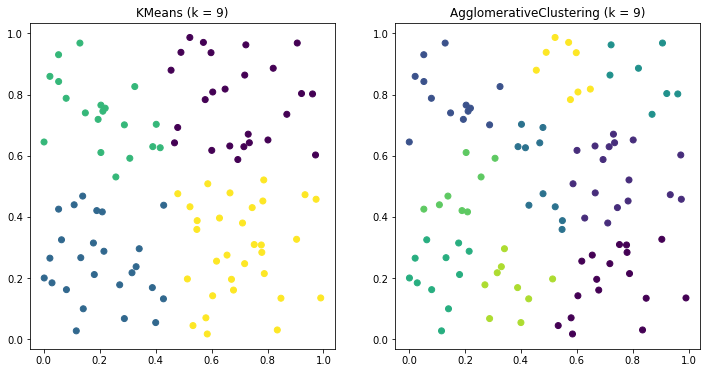

In [131]:
# KMeans
kmeans_scores = []
kmeans_params = range(2, 11)
for k in kmeans_params:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kmeans_scores.append(silhouette_score(data, kmeans.labels_))

best_k = kmeans_params[np.argmax(kmeans_scores)]
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(data)

# AgglomerativeClustering
agg_scores = []
agg_params = range(2, 11)
for k in agg_params:
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(data)
    agg_scores.append(silhouette_score(data, agg.labels_))

best_k = agg_params[np.argmax(agg_scores)]
agg = AgglomerativeClustering(n_clusters=best_k)
agg.fit(data)

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
plt.title("KMeans (k = {})".format(best_k))

plt.subplot(122)
plt.scatter(data[:, 0], data[:, 1], c=agg.labels_)
plt.title("AgglomerativeClustering (k = {})".format(best_k))


plt.savefig('clustering.png')

plt.show()


### 3. Considere o conjunto de dados dados_ex3.csv que contém informação sobre a idade e o rendimento anual (em milhares de dolares) de diferentes clientes de uma empresa.
a. Explore brevemente os dados.

b. Agrupe os dados em clusters e justifique o número de clusters que utilizou.

              Age  Annual Income (k$)
count  200.000000          200.000000
mean    38.850000           60.560000
std     13.969007           26.264721
min     18.000000           15.000000
25%     28.750000           41.500000
50%     36.000000           61.500000
75%     49.000000           78.000000
max     70.000000          137.000000


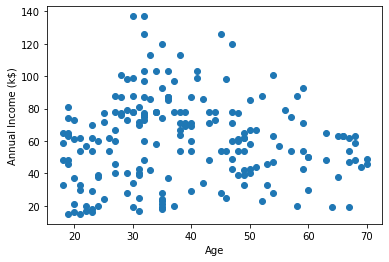

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

df3 = pd.read_csv("dados_ex3.csv")
print(df3.describe())
plt.scatter(df3['Age'], df3['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.savefig('dispercao.png')
plt.show()
#salvar em um arquivo excel a tabela 
df3.describe().to_excel('describe3.xlsx', index=False)

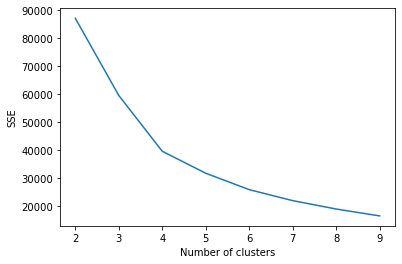

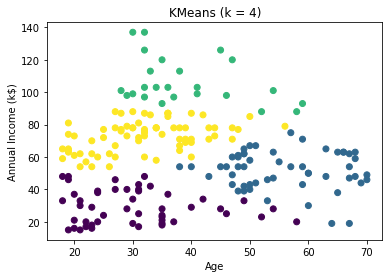

In [143]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def determine_k(X):
    sse = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    return sse

def cluster_data(df3, n_clusters):
    X = df3.values
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    return labels

def plot_clusters(df3, labels):
    plt.scatter(df3['Age'], df3['Annual Income (k$)'], c=labels)
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.title("KMeans (k = {})".format(n_clusters))
    plt.savefig('Clusters.png')
    plt.show()

sse = determine_k(df3.values)
plt.plot(range(2, 10), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.savefig('SSE.png')
plt.show()

n_clusters = 4
labels = cluster_data(df3, n_clusters)
plot_clusters(df3, labels)
